### Plot No. 1: Raw data of one BHE
from July 1., 2018 to July 31, 2023 (complete data period)

In [1]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import numpy as np
import pandas as pd
from datetime import datetime as dt
from dateutil.relativedelta import *
import pickle
from functools import reduce

In [2]:
from helpers import load, plot
fig_width = 6.33
plot.ERC_Management().set_plot_params()

(<Figure size 1899x750 with 2 Axes>,
 <Axes: title={'center': 'Raw data of BHE 16'}, ylabel='T [°C]'>)

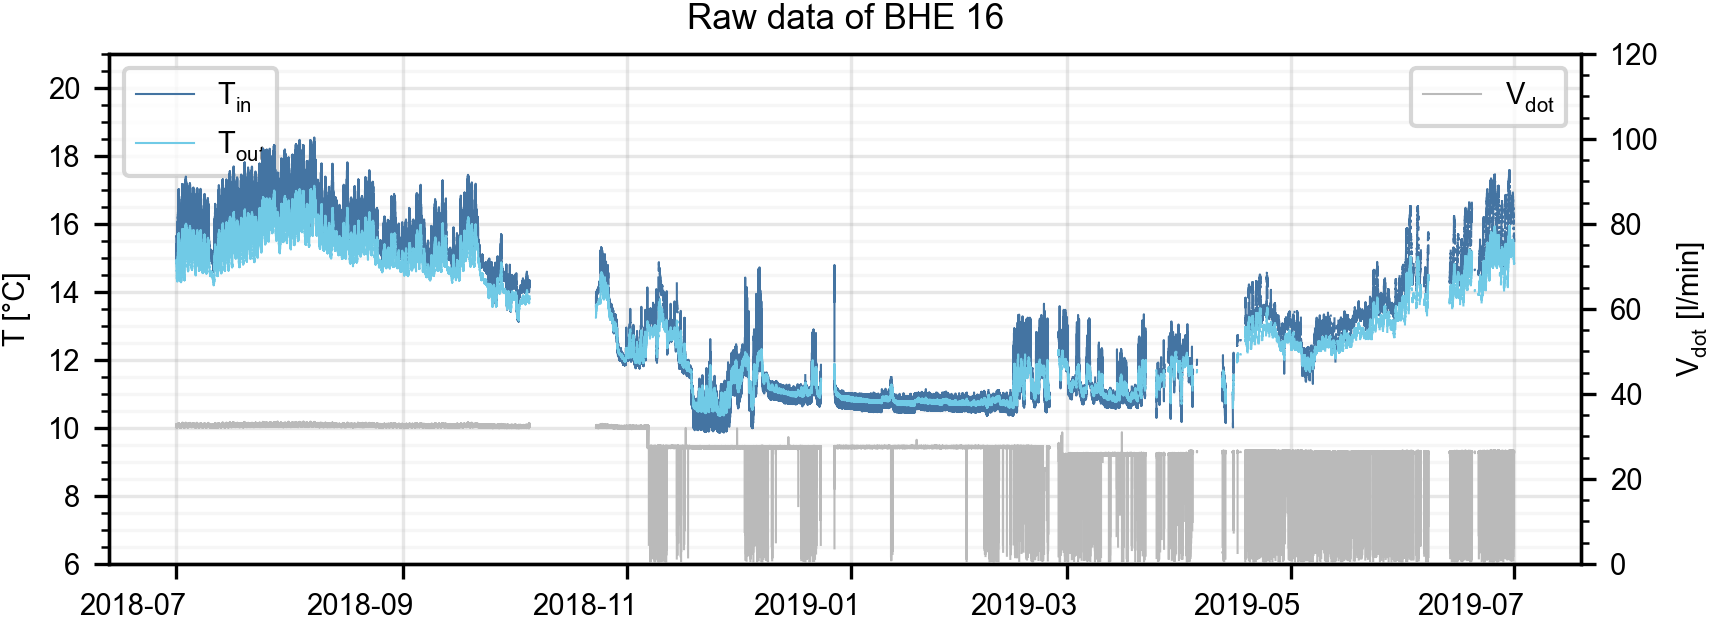

In [3]:
BHE = 16
BHE_data = load.load_data("2018-07-01 00:00:00", "2019-06-30 23:59:59", BHEs = BHE, masked=True, data_type='raw')

colordict = {f'Probe_{BHE:02d}_T_in': '#4474A2', f'Probe_{BHE:02d}_T_out': '#70CAE6', f'Probe_{BHE:02d}_V_dot': '#BABABA'}
plot.plot_one_BHE(BHE_data, BHE, colordict=colordict, figsize=(fig_width,2.5), dpi=300, title=f'Raw data of BHE {BHE}')

(<Figure size 1899x750 with 2 Axes>,
 <Axes: title={'center': 'Prepared data of BHE 13'}, ylabel='T [°C]'>)

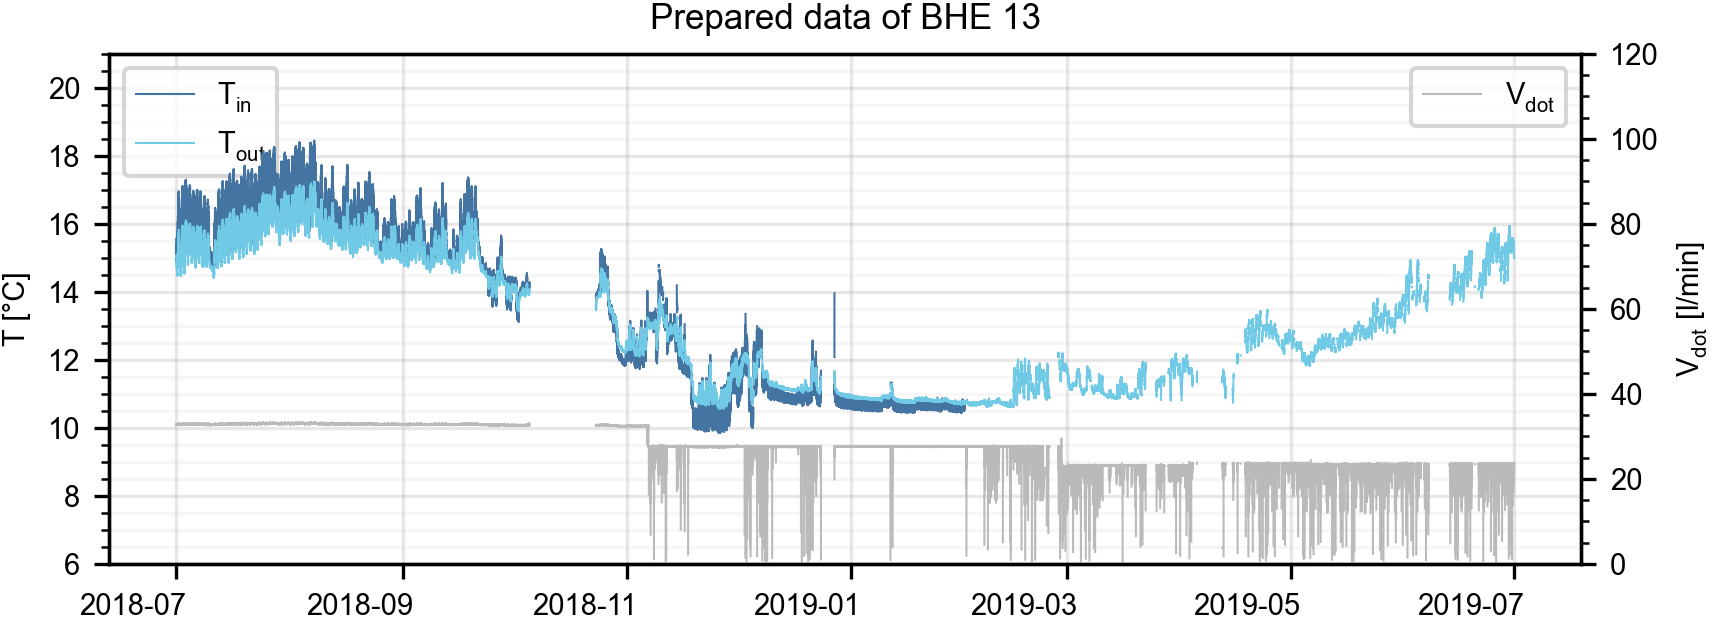

In [7]:
BHE = 13
BHE_data = load.load_data("2018-07-01 00:00:00", "2019-06-30 23:59:59", BHEs = BHE, masked=True, data_type='prepared')

colordict = {f'Probe_{BHE:02d}_T_in': '#4474A2', f'Probe_{BHE:02d}_T_out': '#70CAE6', f'Probe_{BHE:02d}_V_dot': '#BABABA'}
plot.plot_one_BHE(BHE_data, BHE, colordict=colordict, figsize=(fig_width,2.5), dpi=300, title=f'Prepared data of BHE {BHE}')

In [ ]:
# plot used for data descriptor article
BHE = 16
BHE_data = load.load_data("2018-07-01 00:00:00", "2024-06-30 23:59:59", BHEs = BHE, masked=True, data_type='raw')

colordict = {f'Probe_{BHE:02d}_T_in': '#4474A2', f'Probe_{BHE:02d}_T_out': '#70CAE6', f'Probe_{BHE:02d}_V_dot': '#BABABA'}
fig, ax = plot.plot_one_BHE(BHE_data, BHE, colordict=colordict, figsize=(fig_width,2.5), dpi=300, title=f'Raw data of BHE {BHE}')

ax.set_xlim("2018-06-20 00:00:00", "2024-08-10 00:00:00")
fig.savefig(f'Raw_data_full_period_{BHE:02d}.pdf', bbox_inches='tight')

### Plot all data for shorter period

In [3]:
## Load data
start_date = '2023-02-08 12:00:00' #gut um nans zu zeigen
end_date = '2023-02-14 18:00:00'
data = load.load_data(start_date, end_date, masked=True)

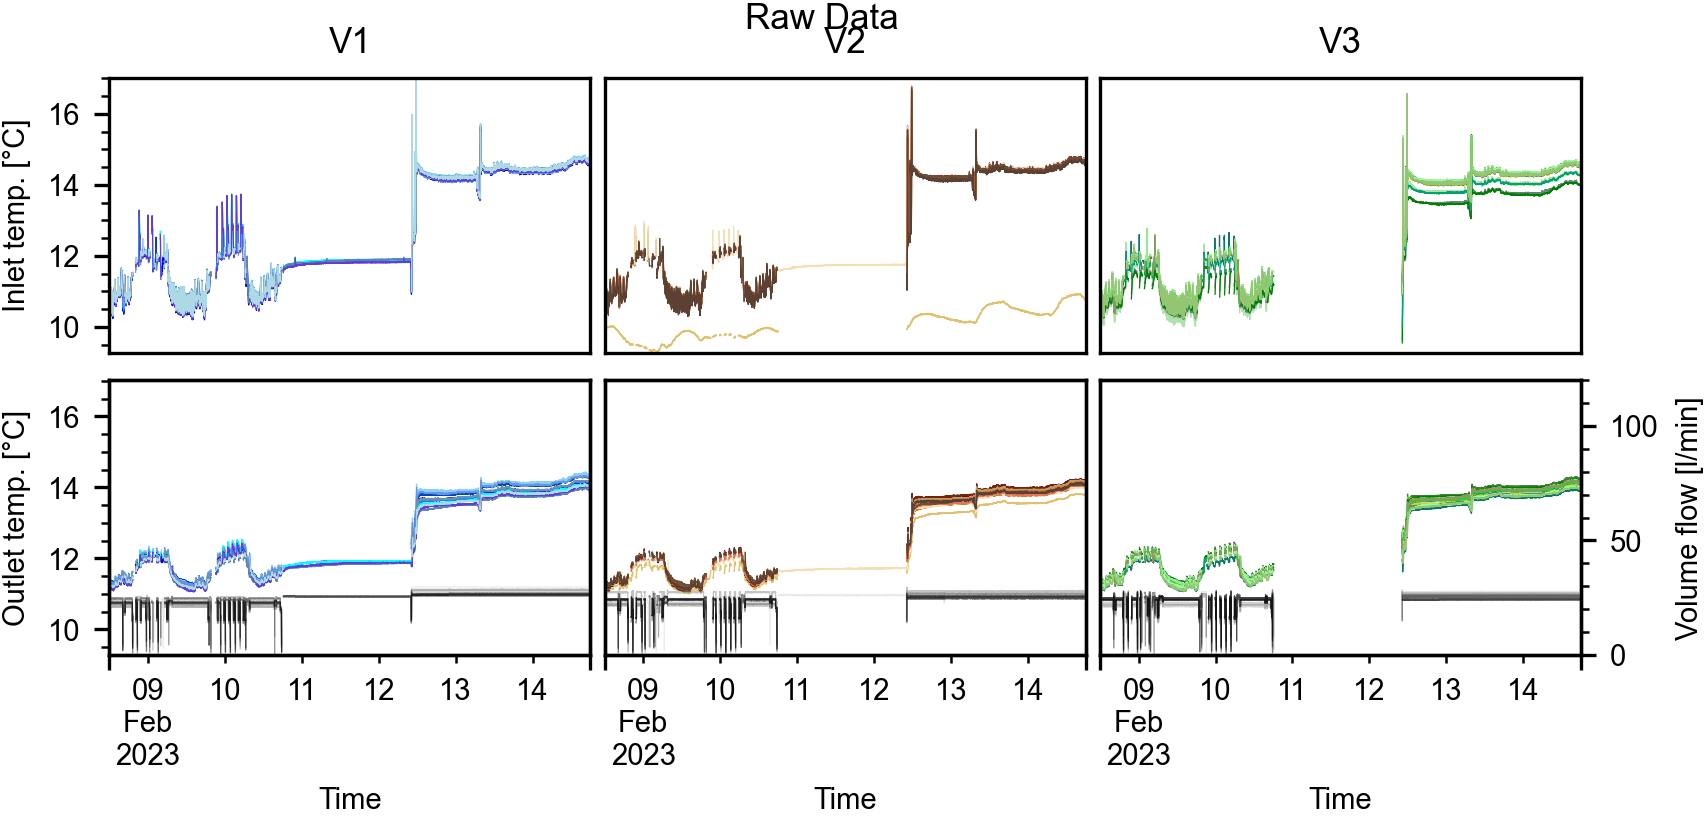

In [4]:
fig = plot.plot_data_by_vault(data, title='Raw Data', figsize=(fig_width,2.5), dpi=300)#, ylims=[10.2, 15.5]) #.loc[pd.to_datetime('2022-06-01 00:00:00'):pd.to_datetime('2022-06-05 12:00:00')]
fig.savefig('Raw_data_by_vault.pdf', bbox_inches='tight')